In [145]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder


In [146]:
df = pd.read_excel('C:/Users/1/Documents/Project/New_data/new_df_director.xlsx', index = False)

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set = split_train_test(df,0.2)

# make X_train and Y_train

copy_train_set = train_set.copy()
copy_train_set['ln_Budget'] = np.log(copy_train_set['Budget'])
attributes = (
    [
#         "Len_genres",
        "Len_country",
        "ln_Budget", 
        "Len_production_co", 
        "Run_time",
        "Age_rating",
#         "Ex_year_writer",
        "Ex_year_director"
    ]
)
scaler = StandardScaler()
sample_for_predict = copy_train_set[attributes]
# key_word = copy_train_set['Key_word']
# key_word_cat_encoded, key_word_categories = key_word.factorize()
# encoder = OneHotEncoder()
# key_word_1hot = (
#     encoder.fit_transform(key_word_cat_encoded.reshape(-1,1))
# )
# kw = key_word_1hot.toarray()
# sample_for_predict ['Key_word'] = key_word_cat_encoded

scaler.fit(sample_for_predict)
X_train = scaler.transform(sample_for_predict)
condition = (
    [
        (copy_train_set['Imdb_rating'] > 7.5)
    ]
)
choice = [1]
y_train = np.select(condition, choice)

# make X_test and Y_test

copy_test_set = test_set.copy()
copy_test_set['ln_Budget'] = np.log(copy_test_set['Budget'])
sample_for_test = copy_test_set[attributes]
# key_word = copy_test_set['Key_word']
# key_word_cat_encoded, key_word_categories = key_word.factorize()
# encoder = OneHotEncoder()
# key_word_1hot = (
#     encoder.fit_transform(key_word_cat_encoded.reshape(-1,1))
# )
# kw = key_word_1hot.toarray()
# sample_for_test ['Key_word'] = key_word_cat_encoded

scaler.fit(sample_for_test)
X_test = scaler.transform(sample_for_test)

condition = (
    [
        (copy_test_set['Imdb_rating'] > 7.5)
    ]
)
y_test = np.select(condition, choice)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:40: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:64: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [37]:
sample_for_predict.corr()

,Len_genres,Len_country,ln_Budget,Len_production_co,Run_time,Age_rating,Ex_year_writer,Ex_year_director,Key_word
Len_genres,1.000000,0.119240,0.337663,0.142503,0.083845,-0.219016,0.107740,0.143882,0.054787
Len_country,0.119240,1.000000,0.139525,0.293892,0.073313,-0.001464,0.124067,0.152257,0.016623
ln_Budget,0.337663,0.139525,1.000000,0.296979,0.240651,-0.260673,0.244773,0.346135,0.093117
Len_production_co,0.142503,0.293892,0.296979,1.000000,0.036509,-0.026415,0.132512,0.191644,0.067152
Run_time,0.083845,0.073313,0.240651,0.036509,1.000000,0.059311,0.129621,0.191395,0.006203
Age_rating,-0.219016,-0.001464,-0.260673,-0.026415,0.059311,1.000000,-0.059307,-0.071181,-0.031731
Ex_year_writer,0.107740,0.124067,0.244773,0.132512,0.129621,-0.059307,1.000000,0.445284,0.040732
Ex_year_director,0.143882,0.152257,0.346135,0.191644,0.191395,-0.071181,0.445284,1.000000,0.071119
Key_word,0.054787,0.016623,0.093117,0.067152,0.006203,-0.031731,0.040732,0.071119,1.000000


In [4]:
# нет линейной зависимости между признаками, не удаляем

In [ ]:
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, LogisticRegression


logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
train_acc.append(logreg.score(X_train, y_train))
test_acc.append(logreg.score(X_test, y_test))
    
train_acc, test_acc  = np.asarray(train_acc), np.asarray(test_acc)

print('LogisticRegression')
print("Best accuracy is {:.3f}%".format(max(test_acc), 
                                                        trees_grid[np.argmax(test_acc)]))


plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.85,1.02])
ax.set_ylabel("Accuracy")

100%|██████████| 100/100 [00:01<00:00, 57.87it/s]


LogisticRegression
Best accuracy is 0.917% with 1 trees


Text(0.5,0,'N_estimators')

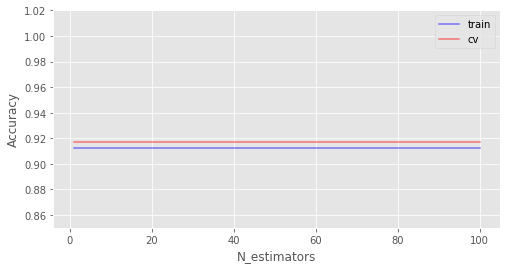

In [33]:
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, LogisticRegression

# n_estimators bb

train_acc = []
test_acc = []
trees_grid = [int(x) for x in np.linspace(start = 1 , stop = 100, num = 100)]

for ntrees in tqdm(trees_grid):
    logreg = LogisticRegression(random_state=ntrees)
    logreg.fit(X_train, y_train)
    train_acc.append(logreg.score(X_train, y_train))
    test_acc.append(logreg.score(X_test, y_test))
    
train_acc, test_acc  = np.asarray(train_acc), np.asarray(test_acc)
print('LogisticRegression')
print("Best accuracy is {:.3f}% with {} trees".format(max(test_acc), 
                                                        trees_grid[np.argmax(test_acc)]))


plt.style.use('ggplot')
%matplotlib inline
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(trees_grid, train_acc, alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc, alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.85,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators")

In [34]:

# X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)



print('Правильность на обучающем наборе: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(logreg.score(X_test, y_test)))
print('Точность на тестовом наборе: {:.3f}'.format(precision_score(y_test, y_pred)))

Правильность на обучающем наборе: 0.912
Правильность на тестовом наборе: 0.917
Точность на тестовом наборе: 0.750


In [69]:
logreg.predict_proba

<bound method LogisticRegression.predict_proba of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [97]:
y_pred_proba = logreg.predict_proba(X_test)

In [98]:
y_pred_proba

array([[0.93310196, 0.06689804],
       [0.95268334, 0.04731666],
       [0.94607742, 0.05392258],
       ...,
       [0.96155627, 0.03844373],
       [0.90604579, 0.09395421],
       [0.95481657, 0.04518343]])

In [67]:
set(y_pred)

{0, 1}

In [1]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
LogisticRegression.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')
LogisticRegression.R2_Y2.plot(ax=axes[1], kind='bar', color='green', title='R2_Y2')

In [38]:
r2_score(y_test, y_pred)

-0.06466041511358767

In [5]:
print('r2_score: 0.815')

r2_score: 0.815


In [2]:
weights = logreg.coef_
abs_weights = np.abs(weights)

print(abs_weights)

In [55]:
import numpy as np

#features names
names_of_variables =np.array(["Len_country", "ln_Budget", "Len_production_co", "Run_time", "Age_rating",  "Ex_year_director"])

#create random weights and get the magnitude
weights = logreg.coef_
abs_weights = np.abs(weights)

In [61]:
abs_weights

array([[0.10233646, 0.13486935, 0.11643098, 0.67053789, 0.25701485,
        0.02943296]])

In [130]:
prob = pd.read_excel('prob.xlsx', index = False)

In [131]:
prob

,Название,Количество стран производства,Натуральный логарифм бюджета,Количество кинокомпаний,Длительность фильма,Минимальный рейтинг возраста зрителя,Опыт режиссера
0,Время первых,1,20.461528,4,140,6,8
1,Притяжение,1,20.856746,4,132,12,12
2,Он — дракон,1,20.688527,1,110,12,0
3,Легенда о Коловрате,1,20.454363,2,117,12,28
4,7 главных желаний,1,17.703689,1,80,6,4
5,Матильда,1,21.320490,1,109,16,25
6,СуперБобровы,1,19.649314,1,95,12,10
7,Воин,1,19.353262,1,90,12,3
8,Русалка. Озеро мертвых,1,18.969981,4,87,16,14
9,Мафия: Игра на выживание,1,19.787070,2,91,16,7


In [133]:
prob = pd.read_excel('prob.xlsx', index = False)

In [134]:
prob

,Количество стран производства,Натуральный логарифм бюджета,Количество кинокомпаний,Длительность фильма,Минимальный рейтинг возраста зрителя,Опыт режиссера
0,1,20.461528,4,140,6,8
1,1,20.856746,4,132,12,12
2,1,20.688527,1,110,12,0
3,1,20.454363,2,117,12,28
4,1,17.703689,1,80,6,4
5,1,21.320490,1,109,16,25
6,1,19.649314,1,95,12,10
7,1,19.353262,1,90,12,3
8,1,18.969981,4,87,16,14
9,1,19.787070,2,91,16,7


In [137]:
X_prob

array([[ 0.        ,  0.53083554,  1.46153846,  1.83712202, -1.73205081,
        -0.35679354],
       [ 0.        ,  0.92149391,  1.46153846,  1.41600522,  0.        ,
         0.10358522],
       [ 0.        ,  0.75521551, -0.84615385,  0.25793404,  0.        ,
        -1.27755106],
       [ 0.        ,  0.52375262, -0.07692308,  0.62641123,  0.        ,
         1.94510026],
       [ 0.        , -2.19518633, -0.84615385, -1.32125395, -1.73205081,
        -0.8171723 ],
       [ 0.        ,  1.37988691, -0.84615385,  0.20529444,  1.15470054,
         1.59981619],
       [ 0.        , -0.27200842, -0.84615385, -0.53165995,  0.        ,
        -0.12660416],
       [ 0.        , -0.56464451, -0.84615385, -0.79485795,  0.        ,
        -0.93226699],
       [ 0.        , -0.94350387,  1.46153846, -0.95277675,  1.15470054,
         0.3337746 ],
       [ 0.        , -0.13584137, -0.07692308, -0.74221835,  1.15470054,
        -0.47188823]])

In [138]:
y_pred_fact = logreg.predict(X_prob)

In [139]:
y_pred_fact

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [90]:
sft = prob.copy()

In [140]:
y_pred_proba = logreg.predict_proba(X_prob)

In [125]:
y_pred_proba[0][1]

0.044426112179232

In [141]:
lll = []
for i in range(len(y_pred_proba)):
    k = y_pred_proba[i-1][1]
    lll.append(k)

In [142]:
lll

[0.034493466888752336,
 0.3154898911100618,
 0.1724513862033278,
 0.07239336026572911,
 0.0930046457001686,
 0.05842185462969765,
 0.0451525997905391,
 0.04855518881478477,
 0.043580610660911734,
 0.0388385214637224]

In [143]:
prob['prob'] = lll

In [144]:
prob

,Количество стран производства,Натуральный логарифм бюджета,Количество кинокомпаний,Длительность фильма,Минимальный рейтинг возраста зрителя,Опыт режиссера,prob
0,1,20.461528,4,140,6,8,0.034493
1,1,20.856746,4,132,12,12,0.315490
2,1,20.688527,1,110,12,0,0.172451
3,1,20.454363,2,117,12,28,0.072393
4,1,17.703689,1,80,6,4,0.093005
5,1,21.320490,1,109,16,25,0.058422
6,1,19.649314,1,95,12,10,0.045153
7,1,19.353262,1,90,12,3,0.048555
8,1,18.969981,4,87,16,14,0.043581
9,1,19.787070,2,91,16,7,0.038839


In [109]:
len(y_pred)

1809

In [135]:
scaler.fit(prob)
# X_prob = scaler.transform(prob)

C:\Users\1\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [136]:
X_prob = scaler.transform(prob)

C:\Users\1\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [103]:
fpr, tpr, thresholds = roc_curve(y_pred, y_test)

In [107]:
roc_auc_score(y_pred,y_test)

0.8339117157134924

In [105]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

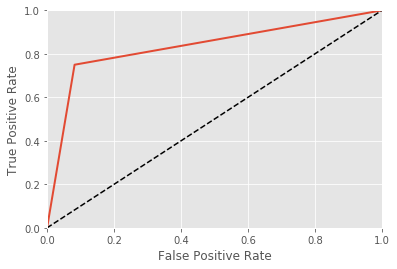

In [106]:
plot_roc_curve(fpr, tpr)
plt.show()